In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Load datasets
patients = pd.read_excel("Cervical Cancer Datasets_.xlsx")
inventory = pd.read_excel("Resources Inventory Cost Sheet.xlsx")
costs = pd.read_excel("Treatment Costs Sheet.xlsx")


In [4]:
patients= patients.drop(columns=['Unnamed: 12'])

print(patients.isnull().sum())

Patient ID                   0
Age                          0
Sexual Partners              0
First Sexual Activity Age    0
HPV Test Result              0
Pap Smear Result             0
Smoking Status               0
STDs History                 0
Region                       0
Insrance Covered             0
Screening Type Last          0
Recommended Action           0
dtype: int64


In [5]:
df=patients.copy()
df

,Patient ID,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Region,Insrance Covered,Screening Type Last,Recommended Action
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION"
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...
95,P0096,31,4,16,POSITIVE,Y,Y,N,Machakos,N,PAP SMEAR,"FOR COLPOSCOPY BIOPSY, CYTOLOGY"
96,P0097,35,5,11,NEGATIVE,N,Y,N,Mombasa,N,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS
97,P0098,35,1,18,POSITIVE,N,Y,N,Kericho,N,HPV DNA,FOR ANUAL FOLLOW UP AND PAP SMEAR IN 3 YEARS
98,P0099,31,1,20,POSITIVE,Y,Y,N,Embu,Y,HPV DNA,"FOR COLPOSCOPY BIOPSY, CYTOLOGY"


In [6]:
# Proper column mapping based on the data structure
column_mapping = {
    'Patient ID': 'patient_id',
    'Age': 'age',
    'Sexual Partners': 'sexual_partners',
    'First Sexual Activity Age': 'first_sexual_age',
    'HPV Test Result': 'hpv_status',
    'Pap Smear Result': 'pap_smear',
    'Smoking Status': 'smoking',
    'STDs History': 'stds_history',
    'Region': 'region',
    'Insrance Covered': 'insurance',
    'Screening Type Last': 'screening_type',
    'Recommended Action': 'recommended_action'
}
df= df.rename(columns={k: v for k, v in column_mapping.items() if k in df.columns})
df

,patient_id,age,sexual_partners,first_sexual_age,hpv_status,pap_smear,smoking,stds_history,region,insurance,screening_type,recommended_action
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION"
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...
95,P0096,31,4,16,POSITIVE,Y,Y,N,Machakos,N,PAP SMEAR,"FOR COLPOSCOPY BIOPSY, CYTOLOGY"
96,P0097,35,5,11,NEGATIVE,N,Y,N,Mombasa,N,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS
97,P0098,35,1,18,POSITIVE,N,Y,N,Kericho,N,HPV DNA,FOR ANUAL FOLLOW UP AND PAP SMEAR IN 3 YEARS
98,P0099,31,1,20,POSITIVE,Y,Y,N,Embu,Y,HPV DNA,"FOR COLPOSCOPY BIOPSY, CYTOLOGY"


In [7]:
df.columns

Index(['patient_id', 'age', 'sexual_partners', 'first_sexual_age',
       'hpv_status', 'pap_smear', 'smoking', 'stds_history', 'region',
       'insurance', 'screening_type', 'recommended_action'],
      dtype='object')

In [8]:
print("\n=== DATA CLEANING ===")


=== DATA CLEANING ===


In [9]:

df['hpv_positive'] = df['hpv_status'].map({'POSITIVE': 1, 'NEGATIVE': 0, 'Y': 1, 'N': 0}).fillna(0)

binary_cols = ['smoking', 'stds_history', 'insurance']
binary_map = {'Y': 1, 'N': 0, 'Yes': 1, 'No': 0}
df[binary_cols] = df[binary_cols].apply(lambda col: col.map(binary_map).fillna(0))




In [10]:
# 2. FEATURE ENGINEERING
# =============================================================================

print("\n=== FEATURE ENGINEERING ===")



=== FEATURE ENGINEERING ===


In [11]:
df['abnormal_pap'] = df['pap_smear'].map({'N': 0, 'Y': 1, 'NORMAL': 0, 'ABNORMAL': 1}).fillna(0)

df['years_sexually_active'] = (df['age'] - df['first_sexual_age']).clip(lower=0)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['<25', '25-35', '35-45', '45-55', '55+'])

df['sexual_partners'] = pd.to_numeric(df['sexual_partners'], errors='coerce')
df['sexual_partners'].fillna(df['sexual_partners'].median(), inplace=True)

df['high_sexual_risk'] = (df['sexual_partners'] > df['sexual_partners'].quantile(0.75)).astype(int)
df['early_sexual_debut'] = (df['first_sexual_age'] < 18).astype(int)

risk_factors = ['hpv_positive', 'abnormal_pap', 'smoking', 'stds_history', 'high_sexual_risk', 'early_sexual_debut']
df['total_risk_score'] = df[risk_factors].sum(axis=1)


    

In [12]:
#Encoding

categorical_cols = ['region', 'screening_type', 'age_group']
for col in categorical_cols:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col].astype(str))


In [13]:
# =============================================================================
# 3. TARGET VARIABLE CREATION
# =============================================================================

print("\n=== TARGET VARIABLE CREATION ===")


=== TARGET VARIABLE CREATION ===


In [14]:


high_risk_actions = ['COLPOSCOPY', 'BIOPSY', 'CYTOLOGY', 'HPV DNA']
moderate_risk_actions = ['PAP SMEAR', 'ANNUAL FOLLOW UP',]
low_risk_actions = ['HPV VACCINE', 'SEXUAL EDUCATION', 'LIFESTYLE']

df['risk_level'] = 0
df['risk_level'] = np.select(
    condlist=[
        df['recommended_action'].str.contains('|'.join(high_risk_actions), case=False, na=False),
        df['recommended_action'].str.contains('|'.join(moderate_risk_actions), case=False, na=False),
        df['recommended_action'].str.contains('|'.join(low_risk_actions), case=False, na=False)
    ],
    choicelist=[2, 1, 0],
    default=0
)



print("Risk level distribution:\n", df['risk_level'].value_counts())





Risk level distribution:
 risk_level
1    56
2    33
0    11
Name: count, dtype: int64


In [15]:
# =============================================================================
# 4. FEATURE SELECTION AND PREPARATION
# =============================================================================


In [16]:
# Select features for modeling
feature_columns = [
    'age', 'sexual_partners', 'first_sexual_age', 'years_sexually_active',
    'hpv_positive', 'abnormal_pap', 'smoking', 'stds_history', 'insurance',
    'high_sexual_risk', 'early_sexual_debut', 'total_risk_score',
    'region_encoded', 'screening_type_encoded', 'age_group_encoded'
]

# Keep only existing columns
feature_columns = [col for col in feature_columns if col in df.columns]
print(f"Selected features: {feature_columns}")

# Prepare feature matrix
X = df[feature_columns].copy()
y = df['high_risk_binary'] if 'high_risk_binary' in df.columns else df['risk_level']

# Handle missing values
X = X.fillna(X.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")


Selected features: ['age', 'sexual_partners', 'first_sexual_age', 'years_sexually_active', 'hpv_positive', 'abnormal_pap', 'smoking', 'stds_history', 'insurance', 'high_sexual_risk', 'early_sexual_debut', 'total_risk_score', 'region_encoded', 'screening_type_encoded', 'age_group_encoded']
Feature matrix shape: (100, 15)
Target distribution: {1: 56, 2: 33, 0: 11}


In [17]:
# =============================================================================
# 5. ADVANCED MODELING PIPELINE
# =============================================================================

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using statistical tests
selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()].tolist()
print(f"Top selected features: {selected_features}")

Top selected features: ['age', 'years_sexually_active', 'hpv_positive', 'abnormal_pap', 'stds_history', 'insurance', 'early_sexual_debut', 'total_risk_score', 'screening_type_encoded', 'age_group_encoded']


In [19]:
# =============================================================================
# 6. MODEL TRAINING AND EVALUATION
# =============================================================================


In [20]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))
    

    cv = cross_val_score(model, X_train_selected, y_train, cv=5)
    print(f"CV Mean: {cv.mean():.4f}, CV Std: {cv.std():.4f}")

    results[name] = {'model': model, 'auc': auc}



Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         7

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.87        20
weighted avg       0.95      0.95      0.94        20

CV Mean: 0.8375, CV Std: 0.0306

Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.89      0.73      0.80        11
           2       1.00      1.00      1.00         7

    accuracy                           0.80        20
   macro avg       0.71      0.74      0.71        20
weighted avg       0.86      0.80      0.82        20

CV Mean: 0.8000, CV Std: 0.0468

Logistic Regression
Classification Report:
               precision    recall  f1-score   s

In [21]:
#=============================================================================
# 7. FEATURE IMPORTANCE ANALYSIS
# =============================================================================


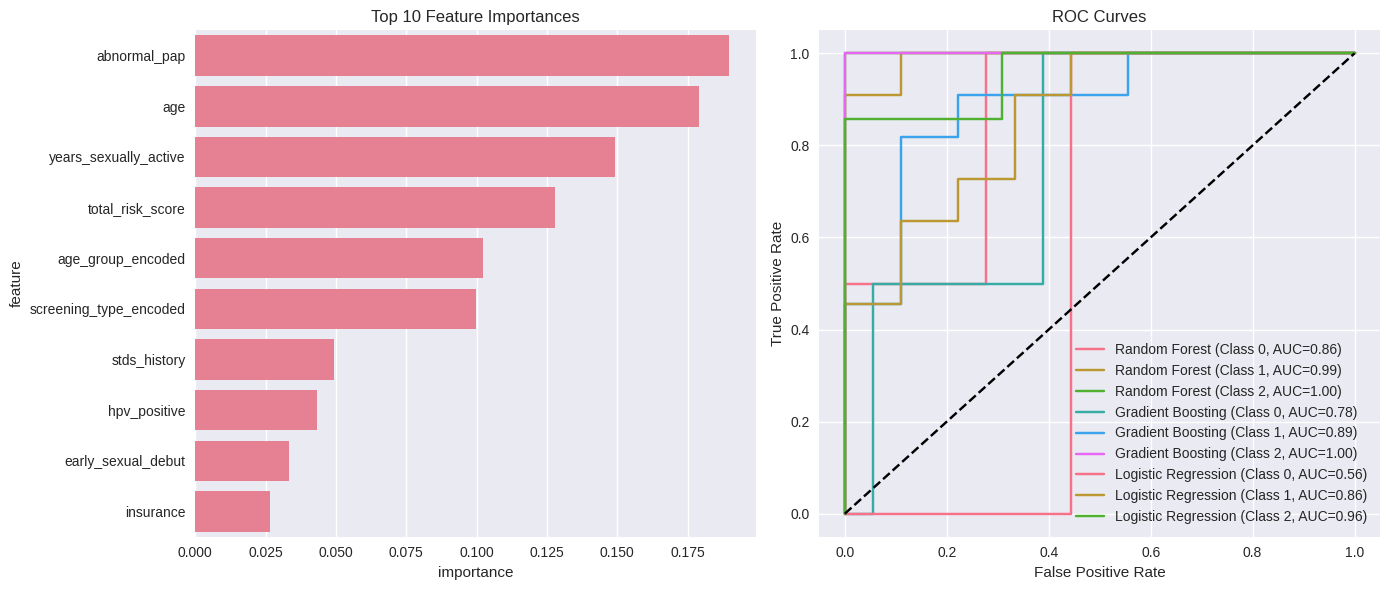

In [22]:

best_model = results['Random Forest']['model']
importances = best_model.feature_importances_

feat_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
feat_df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=feat_df.head(10), y='feature', x='importance')
plt.title("Top 10 Feature Importances")

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.subplot(1, 2, 2)
for name, res in results.items():
    model = res['model']
    y_score = model.predict_proba(X_test_selected)

    for i, class_id in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (Class {class_id}, AUC={roc_auc:.2f})")
        
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')
#loaded_model = joblib.load('random_forest_model.pkl')

['random_forest_model.pkl']

**DEMAND FORECASTING**

In [24]:
#!pip install prophet
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb



In [25]:
#display dataset
inventory

,Facility,Region,Category,Item,Cost (KES),Available Stock
0,Pumwani Maternity Hospital,Pumwani,Medications,Ibuprofen 400mg,1935.25,94
1,Kakamega County Referral Hospital,Kakamega,Medications,Combined Oral Contraceptives,4758.50,28
2,Machakos Level 5 Hospital,Machakos,Medications,Paracetamol 500mg,3686.77,86
3,Embu Level 5 Hospital,Embu,Medications,Paracetamol 500mg,3033.43,75
4,Mombasa County Hospital,Mombasa,Medications,Ibuprofen 400mg,864.49,3
...,...,...,...,...,...,...
95,Machakos Level 5 Hospital,Machakos,Consumables,Syringe 5ml,2519.60,0
96,Mombasa County Hospital,Mombasa,Consumables,Pelvic Ultrasound Gel,2661.39,100
97,Kericho County Referral Hospital,Kericho,Consumables,Pelvic Ultrasound Gel,2194.95,54
98,Embu Level 5 Hospital,Embu,Consumables,Latex Gloves (pair),224.55,19


In [26]:
# ----------------------
inventory['Log_Cost'] = np.log1p(inventory['Cost (KES)'])

<Axes: xlabel='Category', ylabel='Available Stock'>

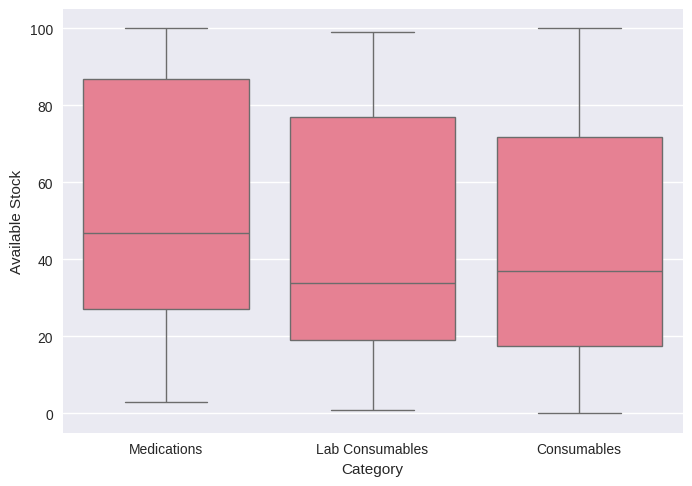

In [27]:
# ----------------------

sns.boxplot(data=inventory, x='Category', y='Available Stock')

In [28]:
# -----Regional Hotspot -------
# ----items with the highest average stock -------

inventory.groupby(['Region', 'Item'])['Available Stock'].mean().sort_values(ascending=False)

Region     Item                        
Mombasa    Pelvic Ultrasound Gel           100.0
Machakos   Pregnancy Test Kit               99.0
Pumwani    Pregnancy Test Kit               96.0
Machakos   Combined Oral Contraceptives     96.0
Pumwani    Ibuprofen 400mg                  94.0
                                           ...  
Kitale     Syringe 5ml                       7.0
Mombasa    Ibuprofen 400mg                   3.0
Embu       CA-125 Test Kit                   3.0
Loitoktok  Pregnancy Test Kit                1.0
Machakos   Syringe 5ml                       0.0
Name: Available Stock, Length: 74, dtype: float64

In [38]:




# Encode categorical features
inventory['Region_Encoded'] = LabelEncoder().fit_transform(inventory['Region'])
inventory['Category_Encoded'] = LabelEncoder().fit_transform(inventory['Category'])
inventory['Item_Encoded'] = LabelEncoder().fit_transform(inventory['Item'])

# Group by Facility + Item to calculate average historical demand
inventory['Avg_Stock_Last3Months'] = inventory.groupby(['Facility', 'Item'])['Available Stock'].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)


0     94.000000
1     28.000000
2     86.000000
3     75.000000
4      3.000000
        ...    
95     0.000000
96    90.500000
97    54.000000
98    18.000000
99    29.333333
Name: Avg_Stock_Last3Months, Length: 100, dtype: float64

In [30]:
#training XGBOOST
features = ['Region_Encoded', 'Category_Encoded', 'Item_Encoded', 'Cost (KES)', 'Avg_Stock_Last3Months']
target = 'Available Stock'

X = inventory[features]
y = inventory[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
joblib.dump(model, 'Demand_Forecasting.pkl')

['Demand_Forecasting.pkl']

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 8.14734172821045
RMSE: 10.905559878662345


In [33]:
#!pip install shap

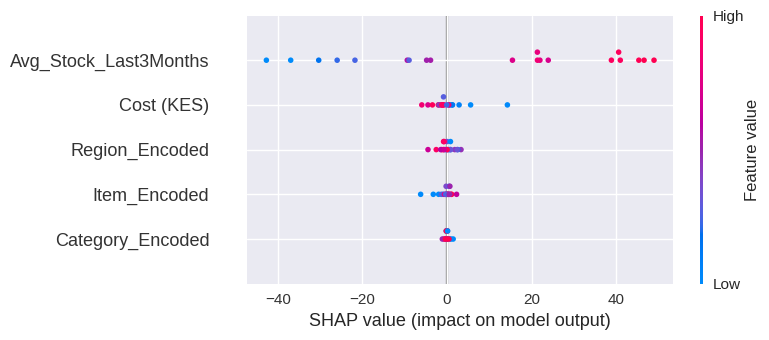

In [34]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Feature importance plot
shap.summary_plot(shap_values, X_test, feature_names=features)

In [41]:
# Example: Predict demand for "Paracetamol 500mg" in "Mombasa County Hospital"
new_data = pd.DataFrame({
    'Region_Encoded': [LabelEncoder().fit_transform(['Machakos'])[0]],
    'Category_Encoded': [LabelEncoder().fit_transform(['Medications'])[0]],
    'Item_Encoded': [LabelEncoder().fit_transform(['Paracetamol 500mg'])[0]],
    'Cost (KES)': [4098.76],  # Current cost
    'Avg_Stock_Last3Months': [90]  # Historical average
})

predicted_demand = model.predict(new_data)
print(f"Predicted Demand: {predicted_demand[0]:.1f} units")

Predicted Demand: 86.6 units


In [43]:
# Safety stock = Z * σ (standard deviation of demand)
z = 1.96  # 95% confidence
safety_stock = z * inventory.groupby('Item')['Available Stock'].std()

# Reorder point = Lead Time Demand + Safety Stock
lead_time_demand = inventory.groupby('Item')['Available Stock'].mean()
reorder_point = lead_time_demand + safety_stock


In [44]:
# loaded_forecaster = joblib.load('prophet_demand_forecast_model.pkl')
# future = loaded_forecaster.make_future_dataframe(periods=6, freq='M')
# forecast = loaded_forecaster.predict(future)


_**COST OPTIMAZATION**_

In [45]:
#!pip install pulp

In [46]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# Define problem: Minimize procurement cost
prob = LpProblem("Inventory_Cost_Optimization", LpMinimize)

# Variables: Quantity to order per item
items = inventory['Item'].unique()
order_vars = {item: LpVariable(item, lowBound=0) for item in inventory['Item'].unique()}

# Objective: Total cost = sum(Cost * Quantity)
prob += lpSum(inventory[inventory['Item'] == item]['Cost (KES)'].iloc[0] * order_vars[item] for item in order_vars)

# Constraints: Demand must be met
for item in order_vars:
    prob += order_vars[item] >= reorder_point[item] - inventory[inventory['Item'] == item]['Available Stock'].iloc[0]

prob.solve()

print("Status:", prob.status)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/asha/anaconda3/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/4a155c3259ea4949906f19b4968e7530-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/4a155c3259ea4949906f19b4968e7530-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 36 RHS
At line 47 BOUNDS
At line 48 ENDATA
Problem MODEL has 10 rows, 10 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-10) rows, 0 (-10) columns and 0 (-10) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 1333365.1
After Postsolve, objective 1333365.1, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1333365.118 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wall

In [47]:
print(prob)

Inventory_Cost_Optimization:
MINIMIZE
384.61*CA_125_Test_Kit + 4758.5*Combined_Oral_Contraceptives + 200.86*Doxycycline_100mg + 1935.25*Ibuprofen_400mg + 1590.79*Latex_Gloves_(pair) + 3686.77*Paracetamol_500mg + 2216.53*Pelvic_Ultrasound_Gel + 2619.75*Pregnancy_Test_Kit + 4852.56*Speculum + 3045.46*Syringe_5ml + 0.0
SUBJECT TO
_C1: Ibuprofen_400mg >= 33.253711037

_C2: Combined_Oral_Contraceptives >= 97.1980076013

_C3: Paracetamol_500mg >= 28.4196903662

_C4: CA_125_Test_Kit >= 86.220422434

_C5: Syringe_5ml >= 71.3138755607

_C6: Doxycycline_100mg >= 13.0756273499

_C7: Speculum >= 39.5004446631

_C8: Latex_Gloves_(pair) >= 48.548058403

_C9: Pelvic_Ultrasound_Gel >= 40.0957065227

_C10: Pregnancy_Test_Kit >= 34.7226834309

VARIABLES
CA_125_Test_Kit Continuous
Combined_Oral_Contraceptives Continuous
Doxycycline_100mg Continuous
Ibuprofen_400mg Continuous
Latex_Gloves_(pair) Continuous
Paracetamol_500mg Continuous
Pelvic_Ultrasound_Gel Continuous
Pregnancy_Test_Kit Continuous
Speculum

In [48]:
for item in items:
    print(f"Order {item}: {int(order_vars[item].varValue)} units")

Order Ibuprofen 400mg: 33 units
Order Combined Oral Contraceptives: 97 units
Order Paracetamol 500mg: 28 units
Order CA-125 Test Kit: 86 units
Order Syringe 5ml: 71 units
Order Doxycycline 100mg: 13 units
Order Speculum: 39 units
Order Latex Gloves (pair): 48 units
Order Pelvic Ultrasound Gel: 40 units
Order Pregnancy Test Kit: 34 units
